 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [ ]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [ ]:
#Set CSV path for returns and history
csv_whale = Path("Resources/whale_returns.csv")
csv_algo = Path("Resources/algo_returns.csv")
csv_sp = Path("Resources/sp_tsx_history.csv")

In [ ]:
# Reading whale returns
whale_returns = pd.read_csv(csv_whale, index_col = "Date", parse_dates = True, infer_datetime_format = True)
whale_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [ ]:
# Count nulls
whale_returns.isnull().mean()

SOROS FUND MANAGEMENT LLC      0.000943
PAULSON & CO.INC.              0.000943
TIGER GLOBAL MANAGEMENT LLC    0.000943
BERKSHIRE HATHAWAY INC         0.000943
dtype: float64

In [ ]:
# Drop nulls
whale_returns = whale_returns.dropna()
whale_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [ ]:
#checking for nulls after drop
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [ ]:
# Reading algorithmic returns
algo_returns = pd.read_csv(csv_algo, index_col = "Date", parse_dates = True, infer_datetime_format = True)
algo_returns

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [ ]:
# Count nulls
algo_returns.isnull().mean()

Algo 1    0.000000
Algo 2    0.004835
dtype: float64

In [ ]:
# Drop nulls
algo_returns = algo_returns.dropna()
algo_returns

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [ ]:
#checking for nulls after drop
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [ ]:
# Reading S&P TSX 60 Closing Prices
SP_returns = pd.read_csv(csv_sp, index_col = "Date", parse_dates = True, infer_datetime_format = True)
SP_returns

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"
...,...
2019-12-20,"$17,118.44"
2019-12-23,"$17,128.71"
2019-12-24,"$17,180.15"


In [ ]:
# Check Data Types
SP_returns.dtypes

Close    object
dtype: object

In [ ]:
# Fix Data Types
SP_returns["Close"] = SP_returns["Close"].str.replace("$","")
SP_returns["Close"] = SP_returns["Close"].str.replace(",","")
SP_returns["Close"] = SP_returns["Close"].astype(float)
SP_returns.dtypes

C:\Users\Jacks\AppData\Local\Temp/ipykernel_148/3758742005.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  SP_returns["Close"] = SP_returns["Close"].str.replace("$","")


Close    float64
dtype: object

In [ ]:
# Calculate Daily Returns
SP_returns = SP_returns.pct_change() 
SP_returns

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [ ]:
# Drop nulls
SP_returns = SP_returns.dropna()
SP_returns

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [ ]:
# Rename `Close` Column to be specific to this portfolio.
SP_returns = SP_returns.rename(columns={"Close": "Daily Returns"})
SP_returns

,Daily Returns
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [ ]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_returns, algo_returns, SP_returns], axis = "columns", join = "inner")
combined_df = combined_df.dropna()
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

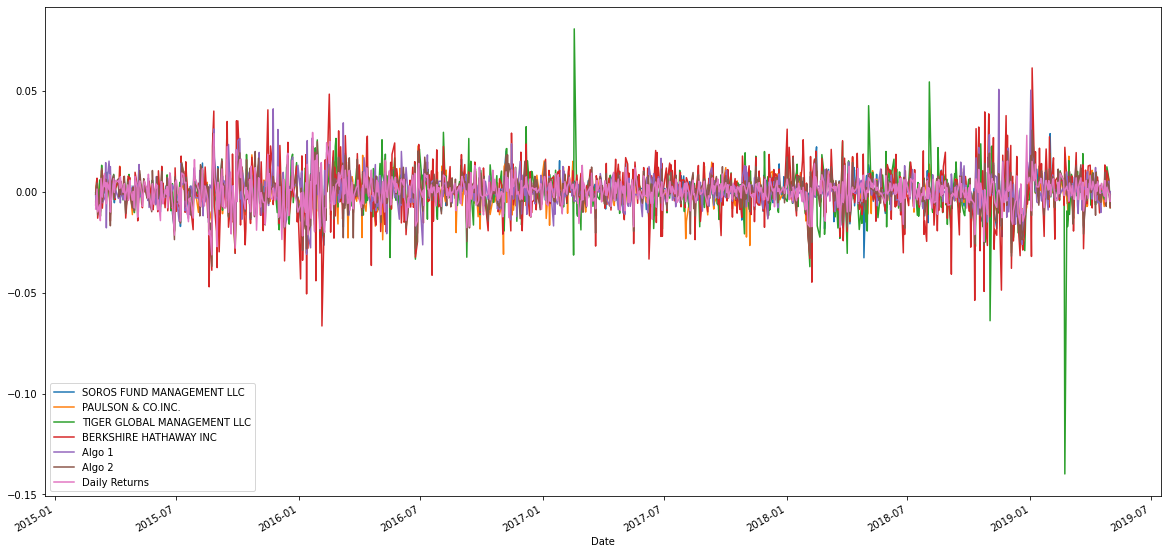

In [ ]:
# Plot daily returns of all portfolios
combined_df.plot(legend=True, figsize = (20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

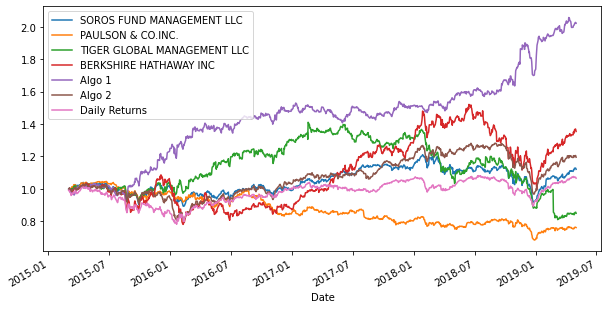

In [57]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod()
cumulative_returns


# Plot cumulative returns
cumulative_returns.plot(figsize = (10,5))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


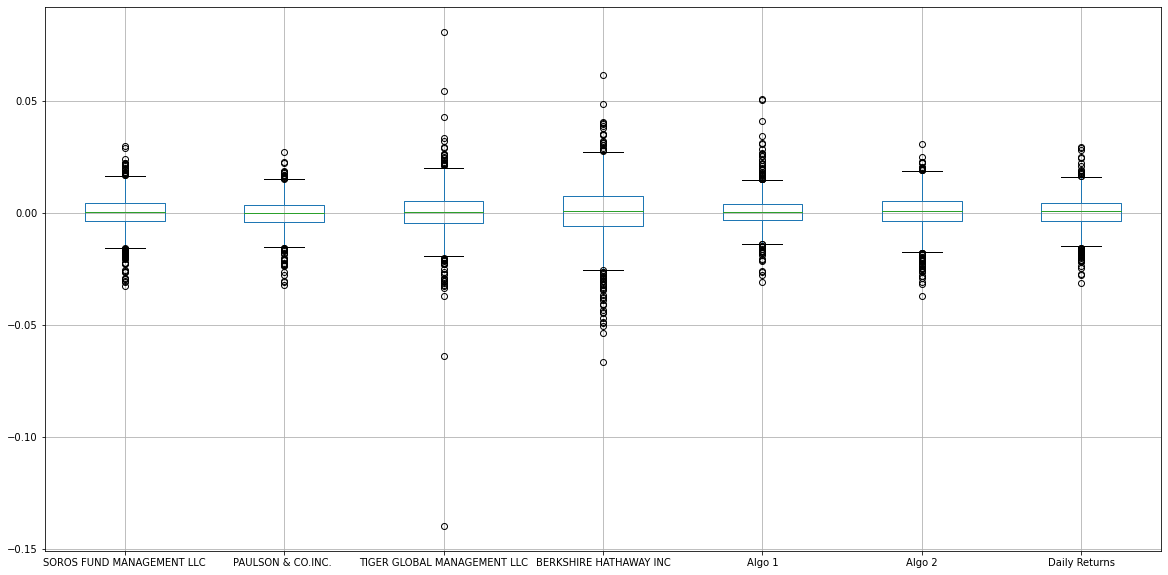

In [ ]:
# Box plot to visually show risk
# box plot for whales
# whales = whale_returns.boxplot(column = ["SOROS FUND MANAGEMENT LLC", "PAULSON & CO.INC. ", "TIGER GLOBAL MANAGEMENT LLC", "BERKSHIRE HATHAWAY INC"], figsize = (20,10))
combined_boxplot = combined_df.boxplot(column = ["SOROS FUND MANAGEMENT LLC","PAULSON & CO.INC. ", "TIGER GLOBAL MANAGEMENT LLC", "BERKSHIRE HATHAWAY INC", "Algo 1", "Algo 2", "Daily Returns"],
                                      figsize = (20,10))

### Calculate Standard Deviations

In [ ]:
# Calculate the daily standard deviations of all portfolios
combined_std = combined_df.std()
combined_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
Daily Returns                  0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [ ]:
# Calculate  the daily standard deviation of S&P TSX 60
daily_std_SP = SP_returns.std()
daily_std_SP

# Determine which portfolios are riskier than the S&P TSX 60
# whale portfolio standard deviation
daily_std_whale = whale_returns.std()


# algo portfolio standard deviation
daily_std_algo = algo_returns.std()
daily_std_SP, daily_std_whale,daily_std_algo, print("Both the whale's portfolio and the algorithm portoflio are riskier than the S&P TSX 60")

Both the whale's portfolio and the algorithm portoflio are riskier than the S&P TSX 60


(Daily Returns    0.006637
 dtype: float64,
 SOROS FUND MANAGEMENT LLC      0.007842
 PAULSON & CO.INC.              0.006977
 TIGER GLOBAL MANAGEMENT LLC    0.010824
 BERKSHIRE HATHAWAY INC         0.012831
 dtype: float64,
 Algo 1    0.007988
 Algo 2    0.008466
 dtype: float64,
 None)

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_std *np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
Daily Returns                  0.111664
dtype: float64

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

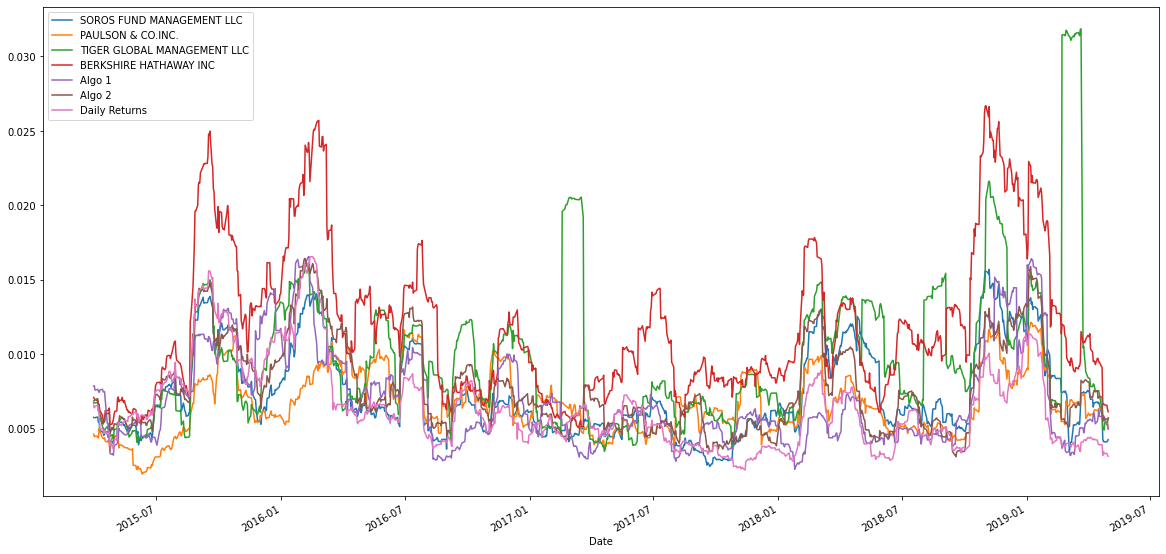

In [ ]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_21 = combined_df.rolling(window = 21).std()


# Plot the rolling standard deviation
rolling_21.plot(figsize = (20,10))

### Calculate and plot the correlation

In [ ]:
# Calculate the correlation
correlation = combined_df.corr()


# Display de correlation matrix
correlation



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
Daily Returns,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [ ]:
# determine portfolio that mimicks the S&P TSX 60
print("Algo 2 has the higest correlation with TSX 60, hence its the one thats the most likely to mimick it")

Algo 2 has the higest correlation with TSX 60, hence its the one thats the most likely to mimick it


<AxesSubplot:xlabel='Date'>

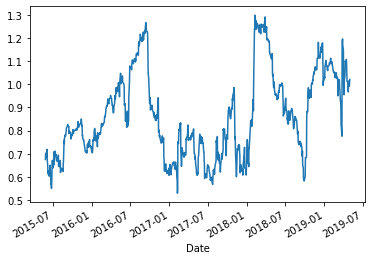

In [52]:
# Calculate covariance of a single portfolio
covariance_Algo2 = combined_df["Algo 2"].cov(combined_df["Daily Returns"])
covariance_Algo2


# Calculate variance of S&P TSX
variance = combined_df["Daily Returns"].var()
variance

# Computing beta
beta2 = covariance_Algo2 / variance

# Plot beta trend

rolling_covariance2 = combined_df["Algo 2"].rolling(window=60).cov(combined_df["Daily Returns"])
rolling_variance = combined_df["Daily Returns"].rolling(window=60).var()
rolling_beta2 = rolling_covariance2 / rolling_variance
rolling_beta2.plot()


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [ ]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Annualized Sharpe Ratios
Sharpe_ratios = combined_df.mean() * 252   / (combined_df.std() * np.sqrt(252))
Sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
Daily Returns                  0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

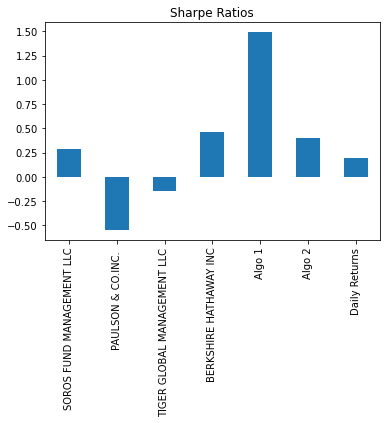

In [ ]:
# Visualize the sharpe ratios as a bar plot
Sharpe_ratios.plot(kind = "bar", title = "Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Algo 1 strategy has outperformed both whale portfolios and the S&P TSX 60
Algo 2 strategy has outperformed both other than Berkshire Hathaway INC

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [ ]:
# Reading data from 1st stock
# resetting the Date fromat by removing time stamp, setting "Date" as index and changing name from Close to GOOG
CSVGOOG = Path("Resources/GOOG.csv")
GOOG = pd.read_csv(CSVGOOG, infer_datetime_format = True, parse_dates = True)
GOOG = GOOG.rename(columns = {"Close" : "GOOG"})
Date = pd.to_datetime(GOOG["Date"], format = "%d/%m/%Y %H:%M:%S").apply(lambda x: x.date())
GOOG = GOOG.drop(["Date"], axis = 1) 
GOOG["Date"] = Date
GOOG = GOOG.set_index(["Date"])
GOOG

,GOOG
Date,
2018-01-02,1065.00
2018-01-03,1082.48
2018-01-04,1086.40
2018-01-05,1102.23
2018-01-08,1106.94
...,...
2019-04-26,1272.18
2019-04-29,1287.58
2019-04-30,1188.48


In [ ]:
# Reading data from 2nd stock
# resetting the Date fromat by removing time stamp, setting "Date" as index and changing name from Close to AMD
CSVAMD = Path("Resources/AMD.csv")
AMD = pd.read_csv(CSVAMD, infer_datetime_format = True, parse_dates = True)
AMD = AMD.rename(columns = {"Close" : "AMD"})
Date = pd.to_datetime(AMD["Date"], format = "%d/%m/%Y %H:%M:%S").apply(lambda x: x.date())
AMD = AMD.drop(["Date"], axis = 1) 
AMD["Date"] = Date
AMD = AMD.set_index(["Date"])
AMD

,AMD
Date,
2018-01-02,10.98
2018-01-03,11.55
2018-01-04,12.12
2018-01-05,11.88
2018-01-08,12.28
...,...
2019-04-26,27.88
2019-04-29,27.69
2019-04-30,27.63


In [ ]:
# Reading data from 3rd stock
# resetting the Date fromat by removing time stamp, setting "Date" as index and changing name from Close to TSLA
CSVTSLA = Path("Resources/TSLA.csv")
TSLA = pd.read_csv(CSVTSLA, infer_datetime_format = True, parse_dates = True)
TSLA = TSLA.rename(columns = {"Close" : "TSLA"})
Date = pd.to_datetime(TSLA["Date"], format = "%d/%m/%Y %H:%M:%S").apply(lambda x: x.date())
TSLA = TSLA.drop(["Date"], axis = 1) 
TSLA["Date"] = Date
TSLA = TSLA.set_index(["Date"])
TSLA

,TSLA
Date,
2018-01-02,64.11
2018-01-03,63.45
2018-01-04,62.92
2018-01-05,63.32
2018-01-08,67.28
...,...
2019-04-26,47.03
2019-04-29,48.29
2019-04-30,47.74


In [ ]:
# Combine all stocks in a single DataFrame & # Reset Date index & # Reorganize portfolio data by having a column per symbol
combined_df1 = pd.concat([GOOG, AMD, TSLA], axis = "columns", join = "inner" )
combined_df1

,GOOG,AMD,TSLA
Date,,,
2018-01-02,1065.00,10.98,64.11
2018-01-03,1082.48,11.55,63.45
2018-01-04,1086.40,12.12,62.92
2018-01-05,1102.23,11.88,63.32
2018-01-08,1106.94,12.28,67.28
...,...,...,...
2019-04-26,1272.18,27.88,47.03
2019-04-29,1287.58,27.69,48.29
2019-04-30,1188.48,27.63,47.74


In [58]:
# Calculate daily returns & # Drop NAs & # Display sample data
combined_df1 = combined_df1.pct_change().dropna()
combined_df1

,GOOG,AMD,TSLA
Date,,,
2018-01-04,-0.779365,-0.049351,-0.188617
2018-01-05,3.023694,-1.401251,-1.761074
2018-01-08,-0.706737,-2.700337,8.837461
2018-01-09,-1.143759,-2.112541,-1.128337
2018-01-10,4.370946,-1.316192,-1.410704
...,...,...,...
2019-04-26,0.164902,-1.282954,0.186838
2019-04-29,0.751927,-1.856821,-1.530791
2019-04-30,-7.358099,-0.682044,-1.425118


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_return = combined_df1.dot(weights)
# Display sample data
portfolio_return.head()

Date
2018-01-03    0.019344
2018-01-04    0.014873
2018-01-05    0.000375
2018-01-08    0.033494
2018-01-09   -0.015367
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame
joined_df = pd.concat([combined_df, portfolio_return], axis = "columns", join = "inner")
joined_df = joined_df.rename(columns = {"custom portfolio" : "Daily Returns" })
joined_df
new_heading = ["SOROS FUND MANAGEMENT LLC","PAULSON & CO.INC.", "TIGER GLOBAL MANAGEMENT LLC", "BERKSHIRE HATHAWAY INC", "Algo 1", "Algo 2", "Daily Returns", "Portfolio Returns"]
joined_df.columns = new_heading
joined_df

C:\Users\Jacks\anaconda3\lib\site-packages\pandas\core\indexes\base.py:334: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  joined_ndarray, lidx, ridx = libjoin.inner_join_indexer(sv, ov)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily Returns,Portfolio Returns
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.019344
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.014873
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,0.000375
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,0.033494
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.015367
...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,-0.021569
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,-0.011870
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,0.010694


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
joined_df.isnull().sum()
print("no nulls presented")

no nulls presented


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`
daily_std = portfolio_return.std()
annualized_std = daily_std * np.sqrt(252)
annualized_std

0.36907729241327886

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

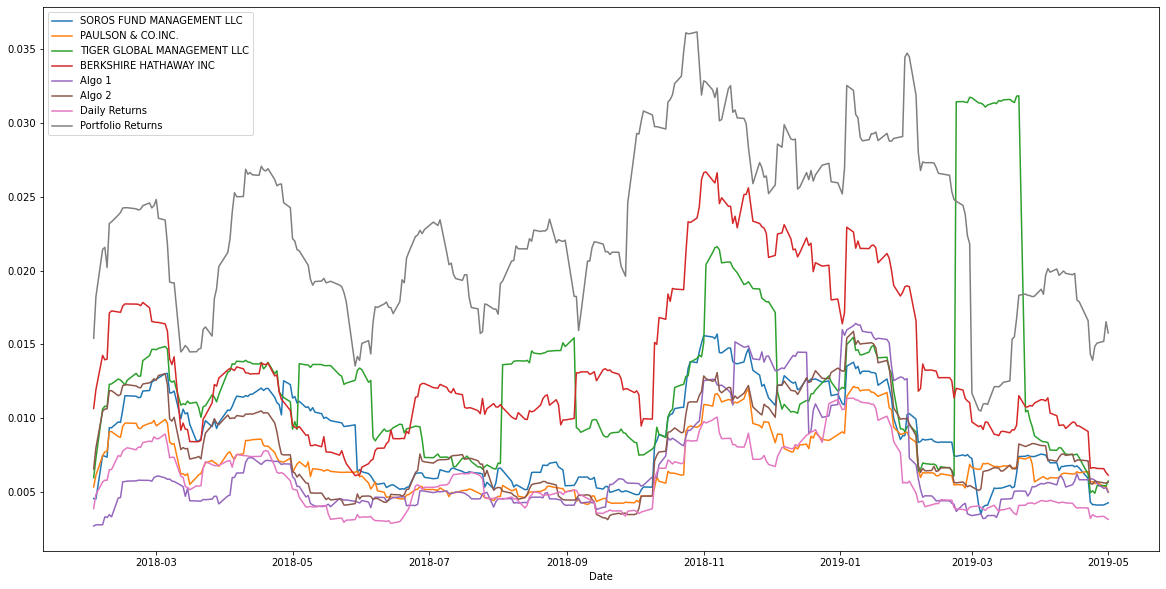

In [ ]:
# Calculate rolling standard deviation
rolling_std = joined_df.rolling(window = 21).std()

# Plot rolling standard deviation
rolling_std.plot(figsize = (20,10))

### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation
rolling_std = joined_df.corr()
rolling_std

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily Returns,Portfolio Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.764174,0.526710,0.782414,0.305525,0.834431,0.686681,0.596613
PAULSON & CO.INC.,0.764174,1.000000,0.536534,0.647407,0.320568,0.797494,0.623728,0.524595
TIGER GLOBAL MANAGEMENT LLC,0.526710,0.536534,1.000000,0.384316,0.130845,0.485258,0.438781,0.332607
BERKSHIRE HATHAWAY INC,0.782414,0.647407,0.384316,1.000000,0.294696,0.783254,0.649817,0.660264
Algo 1,0.305525,0.320568,0.130845,0.294696,1.000000,0.321837,0.284789,0.178418
Algo 2,0.834431,0.797494,0.485258,0.783254,0.321837,1.000000,0.754326,0.619127
Daily Returns,0.686681,0.623728,0.438781,0.649817,0.284789,0.754326,1.000000,0.457520
Portfolio Returns,0.596613,0.524595,0.332607,0.660264,0.178418,0.619127,0.457520,1.000000


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:xlabel='Date'>

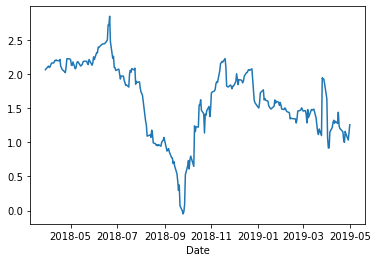

In [55]:
# Calculate and plot Beta = covariance/variance
#calculating covariance of custome portfolio return against Daily Returns
covariance_PR = joined_df["Portfolio Returns"].rolling(window = 60).cov(joined_df["Daily Returns"])
#calculating variance of S&P TSX
variance_PR = joined_df["Daily Returns"].rolling(window = 60).var()

#Beta and plotting
beta = covariance_PR / variance_PR
beta.plot()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios
Sharpe_ratios = joined_df.mean() * 252   / (joined_df.std() * np.sqrt(252))
Sharpe_ratios

SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
BERKSHIRE HATHAWAY INC         0.195907
Algo 1                         1.901461
Algo 2                         0.021394
Daily Returns                  0.034651
Portfolio Returns              0.685727
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

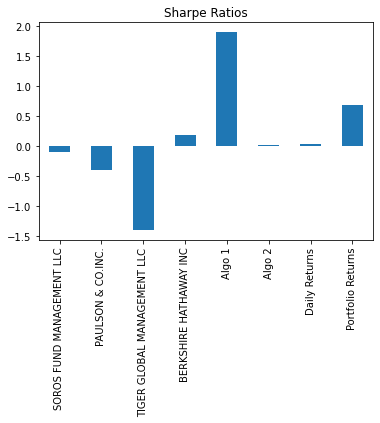

In [ ]:
# Visualize the sharpe ratios as a bar plot
Sharpe_ratios.plot(kind = "bar", title = "Sharpe Ratios")

### How does your portfolio do?

My portfolio has out performed all other portfolios other than Algo 1, who is performing much better than than my own portfolio.